### Here is step 8 because my computer couldn't handle having it in the other notebook

In [2]:
# ---------------------------------
# 0. Copy all this script into one cell, between steps 7 and 8 of your final project
#    You will need to install the "reproject" package with pip
#    This script will "reproject" all images onto the same shape using one image as a reference
# ---------------------------------

from astropy.io import fits
from astropy.wcs import WCS
from reproject import reproject_interp

# ---------------------------------
# 1. Load your reference image
#    This will define the WCS and shape for all others
# ---------------------------------
file_reference = "/Users/joeymckeown/Desktop/ASTR19CODE/final_project/MAST_2025-06-08T2032/JWST/jw02731-o001_t017_nircam_clear-f090w/jw02731-o001_t017_nircam_clear-f090w_i2d.fits"
with fits.open(file_reference) as hdulist:
    # For JWST i2d images, 'SCI' is commonly the science extension
    ref_header = hdulist['SCI'].header
    ref_data = hdulist['SCI'].data

# Create a WCS object from the reference
ref_wcs = WCS(ref_header)

# This shape will be used for all reprojected images
output_shape = ref_data.shape

# ---------------------------------
# 2. Reproject the other images
# ---------------------------------
fname1 = "/Users/joeymckeown/Desktop/ASTR19CODE/final_project/MAST_2025-06-08T2032/JWST/jw02731-o001_t017_nircam_clear-f187n/jw02731-o001_t017_nircam_clear-f187n_i2d.fits"
fname2 = "/Users/joeymckeown/Desktop/ASTR19CODE/final_project/MAST_2025-06-08T2032/JWST/jw02731-o001_t017_nircam_clear-f200w/jw02731-o001_t017_nircam_clear-f200w_i2d.fits"
fname3 = "/Users/joeymckeown/Desktop/ASTR19CODE/final_project/MAST_2025-06-08T2032/JWST/jw02731-o001_t017_nircam_clear-f335m/jw02731-o001_t017_nircam_clear-f335m_i2d.fits"
fname4 = "/Users/joeymckeown/Desktop/ASTR19CODE/final_project/MAST_2025-06-08T2032/JWST/jw02731-o001_t017_nircam_clear-f444w/jw02731-o001_t017_nircam_clear-f444w_i2d.fits"
fname5 = "/Users/joeymckeown/Desktop/ASTR19CODE/final_project/MAST_2025-06-08T2032/JWST/jw02731-o001_t017_nircam_f444w-f470n/jw02731-o001_t017_nircam_f444w-f470n_i2d.fits"

other_filenames = [
    fname1,
    fname2,
    fname3,
    fname4,
    fname5,
]

# Reproject all other files according to the reference
for fname in other_filenames:
    with fits.open(fname) as hdulist:
        data = hdulist['SCI'].data
        header = hdulist['SCI'].header
        wcs_in = WCS(header)
    
    # Reproject this image onto the reference WCS
    # reproject_interp returns (reprojected_data, footprint)
    reprojected_data, footprint = reproject_interp(
        (data, wcs_in),
        ref_wcs,
        shape_out=output_shape
    )

    # Optionally, update the header to match the reference WCS
    # so that the new FITS is self-consistent
    new_header = ref_header.copy()

    # Save the new file
    out_name = fname.replace('.fits', '_reproj.fits')
    hdu = fits.PrimaryHDU(reprojected_data, header=new_header)
    hdu.writeto(out_name, overwrite=True)
    print(f"Reprojected {fname} -> {out_name}")

Reprojected /Users/joeymckeown/Desktop/ASTR19CODE/final_project/MAST_2025-06-08T2032/JWST/jw02731-o001_t017_nircam_clear-f187n/jw02731-o001_t017_nircam_clear-f187n_i2d.fits -> /Users/joeymckeown/Desktop/ASTR19CODE/final_project/MAST_2025-06-08T2032/JWST/jw02731-o001_t017_nircam_clear-f187n/jw02731-o001_t017_nircam_clear-f187n_i2d_reproj.fits
Reprojected /Users/joeymckeown/Desktop/ASTR19CODE/final_project/MAST_2025-06-08T2032/JWST/jw02731-o001_t017_nircam_clear-f200w/jw02731-o001_t017_nircam_clear-f200w_i2d.fits -> /Users/joeymckeown/Desktop/ASTR19CODE/final_project/MAST_2025-06-08T2032/JWST/jw02731-o001_t017_nircam_clear-f200w/jw02731-o001_t017_nircam_clear-f200w_i2d_reproj.fits
Reprojected /Users/joeymckeown/Desktop/ASTR19CODE/final_project/MAST_2025-06-08T2032/JWST/jw02731-o001_t017_nircam_clear-f335m/jw02731-o001_t017_nircam_clear-f335m_i2d.fits -> /Users/joeymckeown/Desktop/ASTR19CODE/final_project/MAST_2025-06-08T2032/JWST/jw02731-o001_t017_nircam_clear-f335m/jw02731-o001_t017_nir

Set DATE-AVG to '2022-06-03T11:43:37.025' from MJD-AVG.
Set DATE-END to '2022-06-03T14:26:16.695' from MJD-END'. [astropy.wcs.wcs]


Reprojected /Users/joeymckeown/Desktop/ASTR19CODE/final_project/MAST_2025-06-08T2032/JWST/jw02731-o001_t017_nircam_f444w-f470n/jw02731-o001_t017_nircam_f444w-f470n_i2d.fits -> /Users/joeymckeown/Desktop/ASTR19CODE/final_project/MAST_2025-06-08T2032/JWST/jw02731-o001_t017_nircam_f444w-f470n/jw02731-o001_t017_nircam_f444w-f470n_i2d_reproj.fits


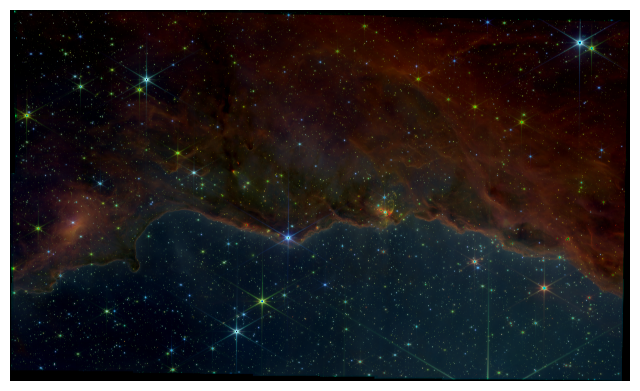

In [1]:
from astropy.io import fits #reimported fits here so that I didn't have to wait for first cell to run
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def rescale_image(data, vmin=0.5, vmax=100):
    data_tmp = data.copy()
    m = np.nanmean(data_tmp)
    vpmin = vmin * m
    vpmax = vmax * m
    data_tmp[data_tmp < vpmin] = vpmin
    data_tmp[data_tmp > vpmax] = vpmax
    data_tmp = np.nan_to_num(data_tmp, nan=vpmin)
    data_tmp = np.log10(data_tmp)
    return data_tmp

def remap(data):
    data_tmp = data.copy()
    dmin = data_tmp.min()
    dmax = data_tmp.max()
    return (data_tmp - dmin) / (dmax - dmin)

# --load all fits files--
base_path = "/Users/joeymckeown/Desktop/ASTR19CODE/final_project/MAST_2025-06-08T2032/JWST/"
reference_file = f"{base_path}jw02731-o001_t017_nircam_clear-f090w/jw02731-o001_t017_nircam_clear-f090w_i2d.fits"
reproj_files = [
    f"{base_path}jw02731-o001_t017_nircam_clear-f187n/jw02731-o001_t017_nircam_clear-f187n_i2d_reproj.fits",
    f"{base_path}jw02731-o001_t017_nircam_clear-f200w/jw02731-o001_t017_nircam_clear-f200w_i2d_reproj.fits",
    f"{base_path}jw02731-o001_t017_nircam_clear-f335m/jw02731-o001_t017_nircam_clear-f335m_i2d_reproj.fits",
    f"{base_path}jw02731-o001_t017_nircam_clear-f444w/jw02731-o001_t017_nircam_clear-f444w_i2d_reproj.fits",
    f"{base_path}jw02731-o001_t017_nircam_f444w-f470n/jw02731-o001_t017_nircam_f444w-f470n_i2d_reproj.fits"
]

# load f090w
hdu = fits.open(reference_file)
data_f090w = hdu['SCI'].data

# load the other files
images = [data_f090w]
for f in reproj_files:
    hdu = fits.open(f)
    images.append(hdu['PRIMARY'].data)

# Chose these based on recommendations on Canvas assignment
# red = f444w (index 4)
# green = f200w (index 2)
# blue = f090w (index 0)

data_red = rescale_image(images[4])
data_green = rescale_image(images[2])
data_blue = rescale_image(images[0])

rgb = np.zeros((data_red.shape[0], data_red.shape[1], 3))
rgb[:, :, 0] = remap(data_red)
rgb[:, :, 1] = remap(data_green)
rgb[:, :, 2] = remap(data_blue)

# --show image and save--
plt.figure(figsize=(8,8))
plt.imshow(rgb)
plt.axis('off')
plt.savefig("nircam_combined_jwst_rgb.png", bbox_inches='tight', dpi=600)
plt.show()
